正規方程式を完全解説(導出あり)【機械学習入門4】
https://datawokagaku.com/normal_equation/

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns

Google ColaboratoryでGitHubのCSVデータをpandasに読み込む
https://yaju3d.hatenablog.jp/entry/2018/06/30/122754


---



In [5]:
import pandas as pd
import urllib.request
from io import StringIO

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"

#csvを読み込む関数
def read_csv(url):
    print(url)
    res = urllib.request.urlopen(url)
    res = res.read().decode("utf-8")
    df = pd.read_csv(StringIO( res) )
    return df

#実行
df=read_csv(url)
df.head()

https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


.describe()でデータ全体の分布を確認することができるんでした．すると，x, y, zカラムの最小値が0になっています．これは異常値だと思うので排除しておきましょう．

In [7]:
#Python
df = df[(df[['x','y','z']] != 0).all(axis=1)]
len(df)

53920

20件ほどのレコードを排除しました．今回はシンプルにしたいので，caratカラムを特徴量としてpriceを予測する線形回帰を正規方程式(XTX)−1XTyを使って作ってみましょう.

まずはcaratとpriceのscatter plotを見てみましょう


---



Text(0, 0.5, 'price')

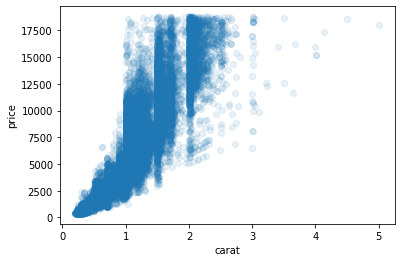

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
 
carat = df['carat'].values
price = df['price'].values
 
plt.scatter(carat, price, alpha=0.1)
plt.xlabel('carat')
plt.ylabel('price')

3.正規方程式実装
まずXを以下のようにして組み立てます．

---



In [9]:
X = np.vstack([np.ones(len(carat)), carat]).T
X

array([[1.  , 0.23],
       [1.  , 0.21],
       [1.  , 0.23],
       ...,
       [1.  , 0.7 ],
       [1.  , 0.86],
       [1.  , 0.75]])

それでは，正規方程式(XTX)−1XTyを使って最適なθを求めてみます

---



In [10]:
y=price

In [34]:
from numpy import linalg as LA

a1 = X.T.dot(X)
b1 = X.T.dot(y)

a2 =LA.inv(a1)

theta_best=a2.dot(b1)

すると，theta_bestは[-2255.76878704, 7755.76725406]となっているのがわかると思います．

---



Text(0, 0.5, 'price')

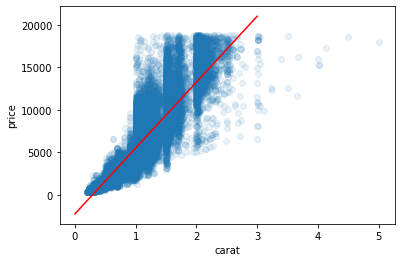

In [35]:
x_axis = np.linspace(0, 3, 10)
y_pred = theta_best[0] + theta_best[1]*x_axis

plt.scatter(carat, price, alpha=0.1)
plt.plot(x_axis, y_pred, 'red')
plt.xlabel('carat')
plt.ylabel('price')

scikit-learnを使って線形回帰モデルを構築する【機械学習入門5】

https://datawokagaku.com/linear_reg_implement/

---

